In [1]:
%run ./OpenFASOC/openfasoc/generators/glayout/gds_display.py.

In [2]:
%cd ./example1/

c:\Users\ARF-DESIGN-CD7\open-source\example1


c:\Users\ARF-DESIGN-CD7\anaconda3\envs\RajPandey\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
from glayout.flow.pdk.util.comp_utils import evaluate_bbox
from glayout.flow.pdk.mappedpdk import MappedPDK
from glayout.flow.routing.straight_route import straight_route
from gdsfactory import Component
from glayout.flow.primitives.fet import pmos, nmos 
from glayout.flow.routing.c_route import c_route

2024-07-29 15:41:42.795 | INFO     | gdsfactory.pdk:activate:337 - 'sky130' PDK is now active
C:\Users\ARF-DESIGN-CD7\AppData\Local\Temp\ipykernel_20744\701888497.py:12: UserWarning: Unnamed cells, 3 in 'Unnamed_e161e435'
  Nand (pdk = sky130).write_gds("Nand_example.gds")
2024-07-29 15:41:45.395 | INFO     | gdsfactory.component:_write_library:1851 - Wrote to 'Nand_example.gds'


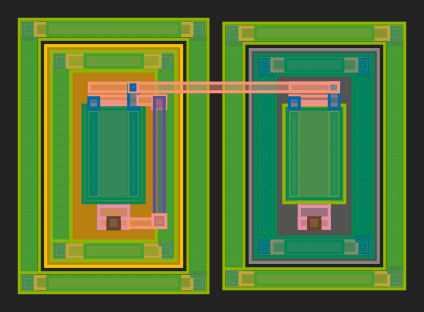

In [4]:
def Nand(pdk: MappedPDK):
    nandComp = Component()
    pfet_pmos = pmos(pdk, length=1, width=3, fingers=1)
    nfet_nmos = nmos(pdk, length=1, width=3, fingers=1)
    cpmos_pmos = nandComp << pfet_pmos
    cnmos_pmos = nandComp << nfet_nmos
    pdk.util_max_metal_seperation()
    cpmos_pmos.movex(evaluate_bbox(nfet_nmos)[0] + pdk.util_max_metal_seperation())
    nandComp << c_route(pdk, cnmos_pmos.ports["multiplier_0_source_E"], cnmos_pmos.ports["multiplier_0_gate_E"])
    nandComp << straight_route(pdk, cpmos_pmos.ports["multiplier_0_drain_E"], cnmos_pmos.ports["multiplier_0_drain_E"])
    return nandComp
Nand (pdk = sky130).write_gds("Nand_example.gds")
display_gds("Nand_example.gds")